Loan Approval Prediction

In [ ]:
#Installing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
df=pd.read_csv('/content/Dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: >

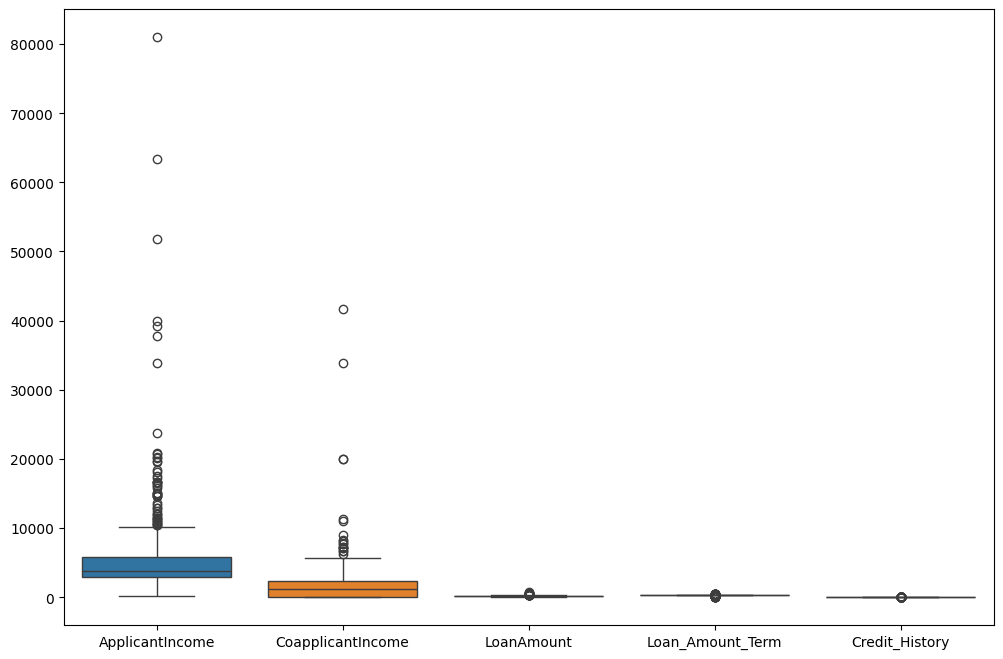

In [ ]:
##checking the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

In [ ]:
df['LoanAmount'].median()

128.0

In [ ]:
df['LoanAmount'].mean()

np.float64(146.41216216216216)

In [ ]:
##Filling the null values of numerical data types
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
##Filling the null vales of object datatype
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


**Exploratory Data Analysis**

Number of people who took loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

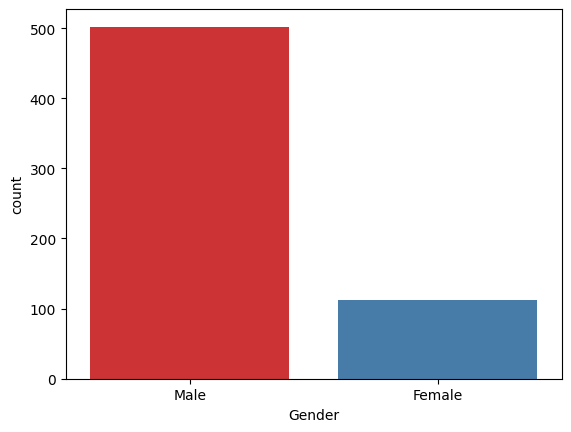

In [ ]:
print('Number of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data = df, palette='Set1')

Number of people who took loan by Married
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

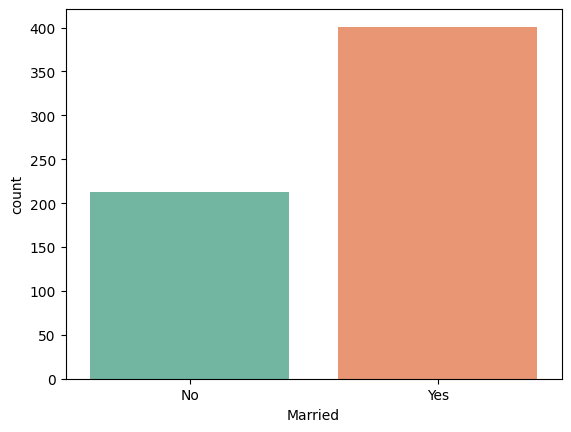

In [ ]:
print('Number of people who took loan by Married')
print(df['Married'].value_counts())
sns.countplot(x='Married',data = df, palette='Set2')

Number of people who took loan by Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

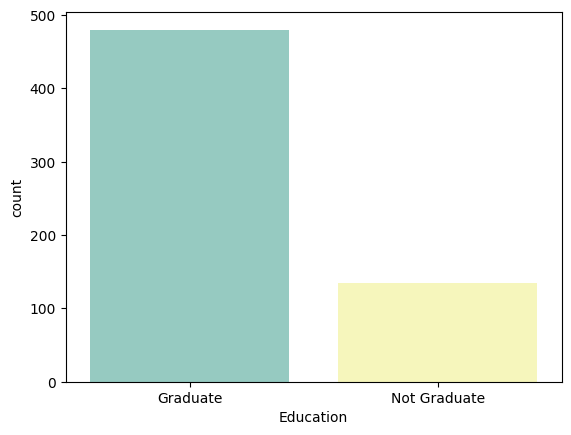

In [ ]:
print('Number of people who took loan by Education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data = df, palette='Set3')

In [ ]:
corr = df.select_dtypes(include=['number']).corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmountlog,Loan_Amount_Term_log
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477,0.437146,-0.024347
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665,0.206646,-0.043119
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031,0.898061,0.044808
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395,0.086618,0.940881
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000,-0.024067,-0.007773
LoanAmountlog,0.437146,0.206646,0.898061,0.086618,-0.024067,1.000000,0.084324
Loan_Amount_Term_log,-0.024347,-0.043119,0.044808,0.940881,-0.007773,0.084324,1.000000


<Axes: >

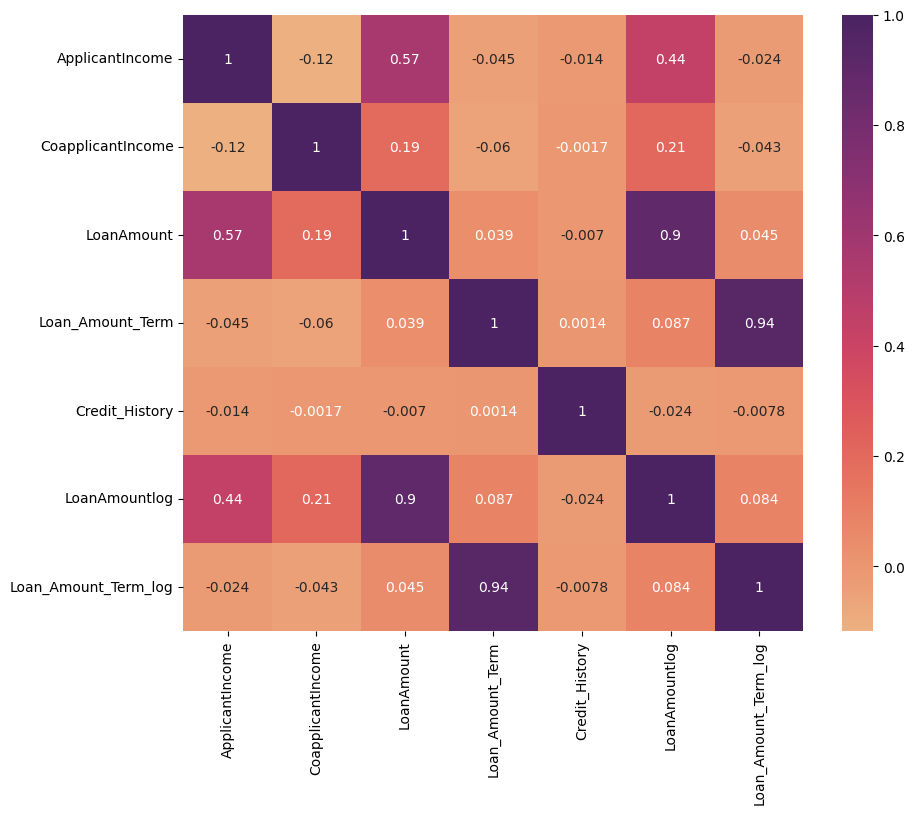

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, cmap = 'flare')

In [ ]:
## Total Applicant Income

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountlog,Loan_Amount_Term_log,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.859812,5.888878,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.859812,5.888878,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.204693,5.888878,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.795791,5.888878,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.955827,5.888878,6000.0


<Axes: xlabel='LoanAmount_log', ylabel='Density'>

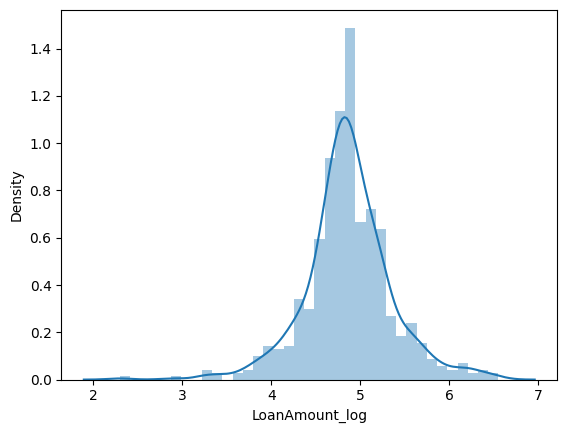

In [ ]:
df['LoanAmount_log'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmount_log'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

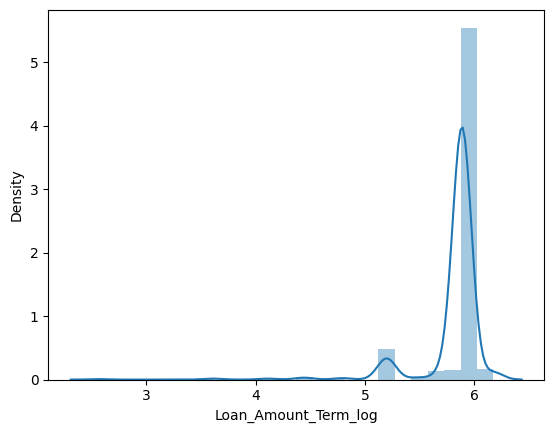

In [ ]:
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term_log'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

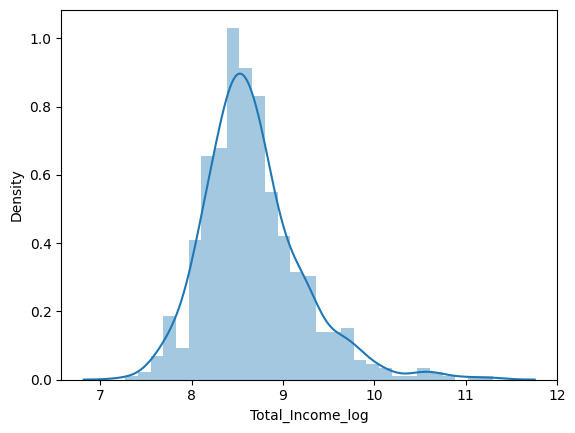

In [ ]:
df['Total_Income_log'] = np.log(df['Total_Income'] + 1)
sns.distplot(df['Total_Income_log'])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountlog,Loan_Amount_Term_log,Total_Income,Total_Income_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.859812,5.888878,5849.0,8.674197,4.859812
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.859812,5.888878,6091.0,8.714732,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.204693,5.888878,3000.0,8.006701,4.204693
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.795791,5.888878,4941.0,8.505525,4.795791
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.955827,5.888878,6000.0,8.699681,4.955827


In [ ]:
##Dropping unnecessary coloumns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns = cols, axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log,LoanAmount_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.859812,5.888878,8.674197,4.859812
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.859812,5.888878,8.714732,4.859812
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.204693,5.888878,8.006701,4.204693
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.795791,5.888878,8.505525,4.795791
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.955827,5.888878,8.699681,4.955827


In [ ]:
## Encoding Technique

from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le =  LabelEncoder()
for col in cols:
  df[col] =  le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log,LoanAmount_log
0,1,0,0,0,0,1.0,2,1,4.859812,5.888878,8.674197,4.859812
1,1,1,1,0,0,1.0,0,0,4.859812,5.888878,8.714732,4.859812
2,1,1,0,0,1,1.0,2,1,4.204693,5.888878,8.006701,4.204693
3,1,1,0,1,0,1.0,2,1,4.795791,5.888878,8.505525,4.795791
4,1,0,0,0,0,1.0,2,1,4.955827,5.888878,8.699681,4.955827


In [ ]:
## Split Independent and dependent features

X = df.drop(columns = ['Loan_Status'],axis = 1)
y = df['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)


In [ ]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_pred_model1 = model1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model1)
print("Accuracy score of Logistic regression", accuracy*100)

Accuracy score of Logistic regression 77.27272727272727


In [ ]:
score = cross_val_score(model1,X,y,cv=5)
print("Cross Validation score of Logistic regression: ",np.mean(score)*100)

Cross Validation score of Logistic regression:  80.9462881514061


In [ ]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred_model2 = model2.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy*100)

Accuracy score of Decision Tree:  68.18181818181817


In [ ]:
score = cross_val_score(model2,X,y,cv=5)
print("Cross Validation score of Decision Tree: ",np.mean(score)*100)

Cross Validation score of Decision Tree:  69.21631347461015


In [ ]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred_model3 = model3.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy*100)

Accuracy score of Random Forest:  75.97402597402598


In [ ]:
#KNearestNeighbors model
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train,y_train)
y_pred_model4 = model4.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model4)
print("Accuracy score of KNeighbors: ", accuracy*100)

Accuracy score of KNeighbors:  72.07792207792207


In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_test,y_pred_model1)
generate_classification_report(model2,y_test,y_pred_model2)
generate_classification_report(model3,y_test,y_pred_model3)
generate_classification_report(model4,y_test,y_pred_model4)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        54
           1       0.74      0.78      0.76       100

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.68      0.68      0.68       154


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.79      0.43      0.55        54
           1       0.75      0.94      0.84       100

    accuracy                

In [ ]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
1,422
0,192


In [ ]:
pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversample = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X,y)

df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=X.columns),pd.Series(y_resampled,name="Loan_status")],axis=1)

In [ ]:
X_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log,LoanAmount_log
0,1,0,0,0,0,1.000000,2,4.859812,5.888878,8.674197,4.859812
1,1,1,1,0,0,1.000000,0,4.859812,5.888878,8.714732,4.859812
2,1,1,0,0,1,1.000000,2,4.204693,5.888878,8.006701,4.204693
3,1,1,0,1,0,1.000000,2,4.795791,5.888878,8.505525,4.795791
4,1,0,0,0,0,1.000000,2,4.955827,5.888878,8.699681,4.955827
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,4.859812,5.198497,8.292298,4.859812
840,1,1,1,0,0,0.842199,0,4.127134,5.888878,7.539559,4.127134
841,1,1,1,0,0,0.000000,0,4.990433,5.888878,8.456381,4.990433
842,1,1,2,1,0,0.000000,2,3.828641,5.198497,7.969012,3.828641


In [ ]:
y_resampled

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
839,0
840,0
841,0
842,0


In [ ]:
y_resampled.value_counts()

,count
Loan_Status,
1,422
0,422


In [ ]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled,y_resampled,test_size = 0.25,random_state=42)

In [ ]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(X_resampled_train,y_resampled_train)
y_pred_model1 = model1.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model1)
accuracy*100

69.66824644549763

In [ ]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(X_resampled_train,y_resampled_train)
y_pred_model2 = model2.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy*100)

Accuracy score of Decision Tree:  84.83412322274881


In [ ]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_resampled_train,y_resampled_train)
y_pred_model3 = model3.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy*100)

Accuracy score of Random Forest:  88.15165876777252


In [ ]:
#KNearestNeighbors model
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_resampled_train,y_resampled_train)
y_pred_model4 = model4.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model4)
print("Accuracy score of KNeighbors: ", accuracy*100)

Accuracy score of KNeighbors:  72.98578199052133


In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_resampled_test,y_pred_model1)
generate_classification_report(model2,y_resampled_test,y_pred_model2)
generate_classification_report(model3,y_resampled_test,y_pred_model3)
generate_classification_report(model4,y_resampled_test,y_pred_model4)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.85      0.54      0.66       114
           1       0.62      0.89      0.73        97

    accuracy                           0.70       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.74      0.70      0.69       211


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       114
           1       0.85      0.81      0.83        97

    accuracy                           0.85       211
   macro avg       0.85      0.85      0.85       211
weighted avg       0.85      0.85      0.85       211


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       114
           1       0.85      0.91      0.88        97

    accuracy                